In [77]:
import sys
import os
import numpy as np

# add the project root to the Python path to allow for absolute imports
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
	sys.path.append(project_root)

from mlfromsc.algorithms.linear_regression import LinearRegressionOLSVariant, LinearRegression

## OLS Method
Its a statistical technique used to find the best-fitting straight line (or hyperplane in higher dimensions) through a set of data points by minimizing the sum of the squared differences between the observed values and the values predicted by the model.

In [78]:

X = np.array([[1, 12],
                 [1, 15],
                 [1, 18],
                 [1, 19],
                 [1, 24]])
y = np.array([[5.1], [8.5], [4.6], [14.3], [9.5]])

model = LinearRegressionOLSVariant(X, y)
model.fit()
print(model.coefficients)

coefficients = model.coefficients

[[1.46403941]
 [0.39408867]]


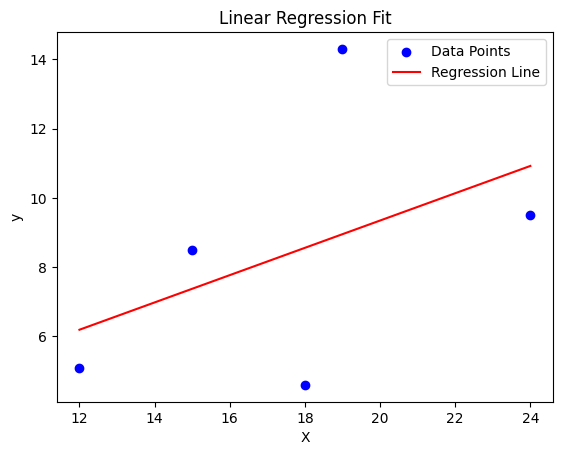

In [ ]:
import matplotlib.pyplot as plt

y_pred = model.predict(X)

plt.scatter(X[:, 1], y, color="blue", label="Data Points")

plt.plot(X[:, 1], y_pred, color="red", label="Regression Line")

plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()

## Gradient Descent
Using Gradient Descent to find the best fitting line. It works by iteratively adjusting the lines parameters (slope and intercept) to reduce the loss function, which measures the error. 

In [80]:
# generate some linear data
np.random.seed(0)
X_raw = np.array([[i] for i in range(50)])

# relationship with noise
y = 10 * X_raw + 5 + np.random.randn(50, 1) * 20

# add bias term to X (well the first 1 column)
X_with_bias = np.hstack([np.ones((X_raw.shape[0], 1)), X_raw])

model = LinearRegression(X_with_bias, y)
model.use_loss_history(True)
model.fit(learning_rate=0.00001, epochs=400)

# eval
r2_score = model.r2_score(X_with_bias, y)
print("R^2 Score:", r2_score)

Epoch 1/400, Loss: 82845.45798653865
Epoch 2/400, Loss: 81519.03581083153
Epoch 3/400, Loss: 80213.99470945136
Epoch 4/400, Loss: 78929.99003303898
Epoch 5/400, Loss: 77666.68268776433
Epoch 6/400, Loss: 76423.73904577484
Epoch 7/400, Loss: 75200.83085708738
Epoch 8/400, Loss: 73997.63516290038
Epoch 9/400, Loss: 72813.83421030332
Epoch 10/400, Loss: 71649.11536836113
Epoch 11/400, Loss: 70503.17104555113
Epoch 12/400, Loss: 69375.69860853095
Epoch 13/400, Loss: 68266.40030221573
Epoch 14/400, Loss: 67174.98317114379
Epoch 15/400, Loss: 66101.15898210974
Epoch 16/400, Loss: 65044.644148044645
Epoch 17/400, Loss: 64005.159653123264
Epoch 18/400, Loss: 62982.43097907854
Epoch 19/400, Loss: 61976.188032703816
Epoch 20/400, Loss: 60986.165074523626
Epoch 21/400, Loss: 60012.10064861431
Epoch 22/400, Loss: 59053.73751355591
Epoch 23/400, Loss: 58110.82257449704
Epoch 24/400, Loss: 57183.10681631479
Epoch 25/400, Loss: 56270.34523785212
Epoch 26/400, Loss: 55372.296787215324
Epoch 27/400, Lo

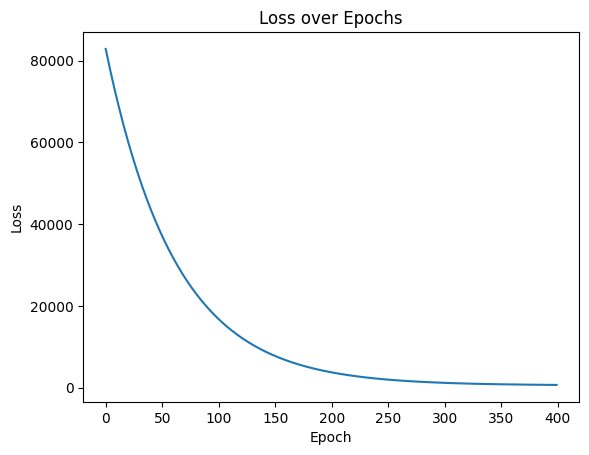

In [81]:
loss_history = model.loss_history
loss_history

plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.show()

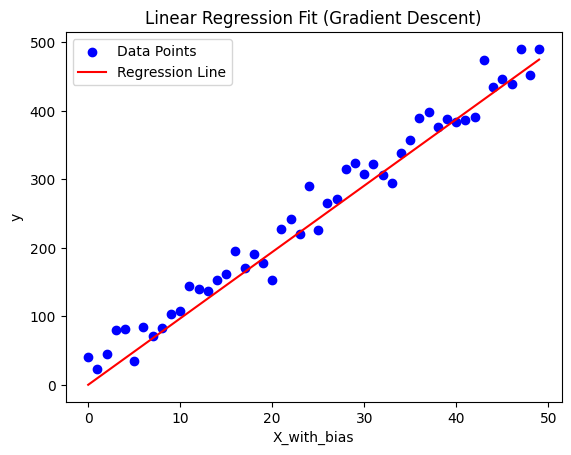

In [ ]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_with_bias)

plt.scatter(X_with_bias[:, 1], y, color="blue", label="Data Points")

plt.plot(X_with_bias[:, 1], y_pred, color="red", label="Regression Line")

plt.xlabel("X_with_bias")
plt.ylabel("y")
plt.title("Linear Regression Fit (Gradient Descent)")
plt.legend()
plt.show()

In [83]:
y_pred2 = model.predict(np.array([[1, 12]]))

y_pred2

array([116.56964982])

### Gradient Descent: 3D data

In [84]:
# generate some linear 3d data
np.random.seed(0)
n_samples = 100
X1 = np.random.uniform(-10, 10, n_samples)
X2 = np.random.uniform(-10, 10, n_samples)

# create a linear relationship with noise
y = 2 * X1 + 3 * X2 + 5 + np.random.randn(n_samples) * 2

# add bias term to X (well the first 1 column)
X = np.c_[np.ones(n_samples), X1, X2]

model = LinearRegressionOLSVariant(X, y)
model.fit()
print("Coefficients:\n", model.coefficients)

coefficients = model.coefficients

Coefficients:
 [4.8041183  1.94483545 2.97411532]


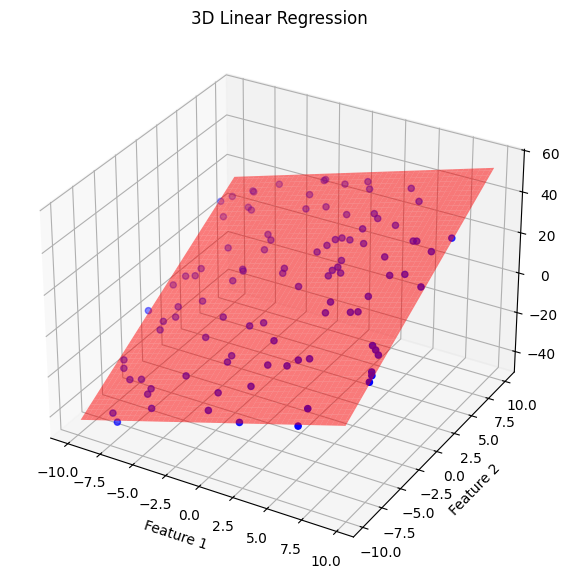

In [85]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(X[:, 1], X[:, 2], y, color="blue", label="Data Points")

x1_surf, x2_surf = np.meshgrid(np.linspace(X[:, 1].min(), X[:, 1].max(), 100),
                               np.linspace(X[:, 2].min(), X[:, 2].max(), 100))

X_surf = np.c_[np.ones(x1_surf.ravel().shape[0]), x1_surf.ravel(), x2_surf.ravel()]

y_surf = model.predict(X_surf)
y_surf = y_surf.reshape(x1_surf.shape)

ax.plot_surface(x1_surf, x2_surf, y_surf, color="red", alpha=0.5, label="Regression Plane")

ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("y")
ax.set_title("3D Linear Regression")
plt.show()